In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load datasets
sales_df = pd.read_csv('sales_data.csv')
churn_df = pd.read_csv('customer_churn.csv')

# Inspect sales_data
print("--- Sales Data Info ---")
print(sales_df.info())
print(sales_df.head())

# Inspect customer_churn
print("\n--- Customer Churn Data Info ---")
print(churn_df.info())
print(churn_df.head())

--- Sales Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
None
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680

Day 1: Descriptive Statistics - Sales
             count       mean            std     min       25%      50%  \
Quantity     100.0       4.78       2.588163     1.0      2.75      5.0   
Price        100.0   25808.51   13917.630242  1308.0  14965.25  24192.0   
Total_Sales  100.0  123650.48  100161.085275  6540.0  39517.50  97955.5   

                   75%       max    mode  
Quantity          7.00       9.0     4.0  
Price         38682.25   49930.0  1308.0  
Total_Sales  175792.50  373932.0  6540.0  

Day 1: Descriptive Statistics - Churn
                count      mean          std    min      25%     50%      75%  \
Tenure          500.0    36.532    20.667057    1.0    19.00    37.0    54.00   
MonthlyCharges  500.0   113.636    51.799903   20.0    67.00   115.0   158.00   
TotalCharges    500.0  4237.882  2260.619837  159.0  2237.25  4182.5  6266.75   

                   max    mode  
Tenure            71.0     3.0  
MonthlyCharges   199.0   115.0  
TotalCharges    7992.0  40

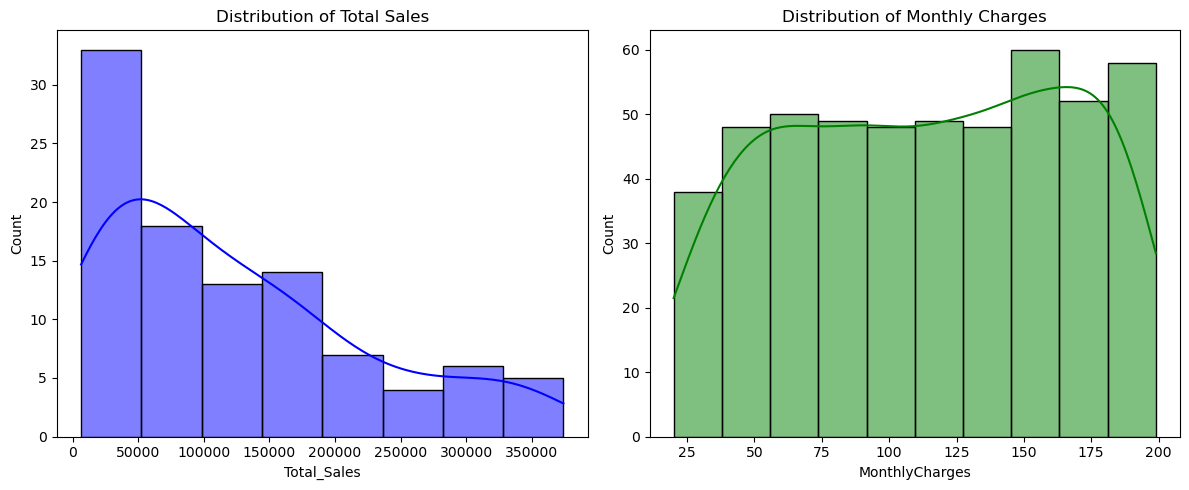

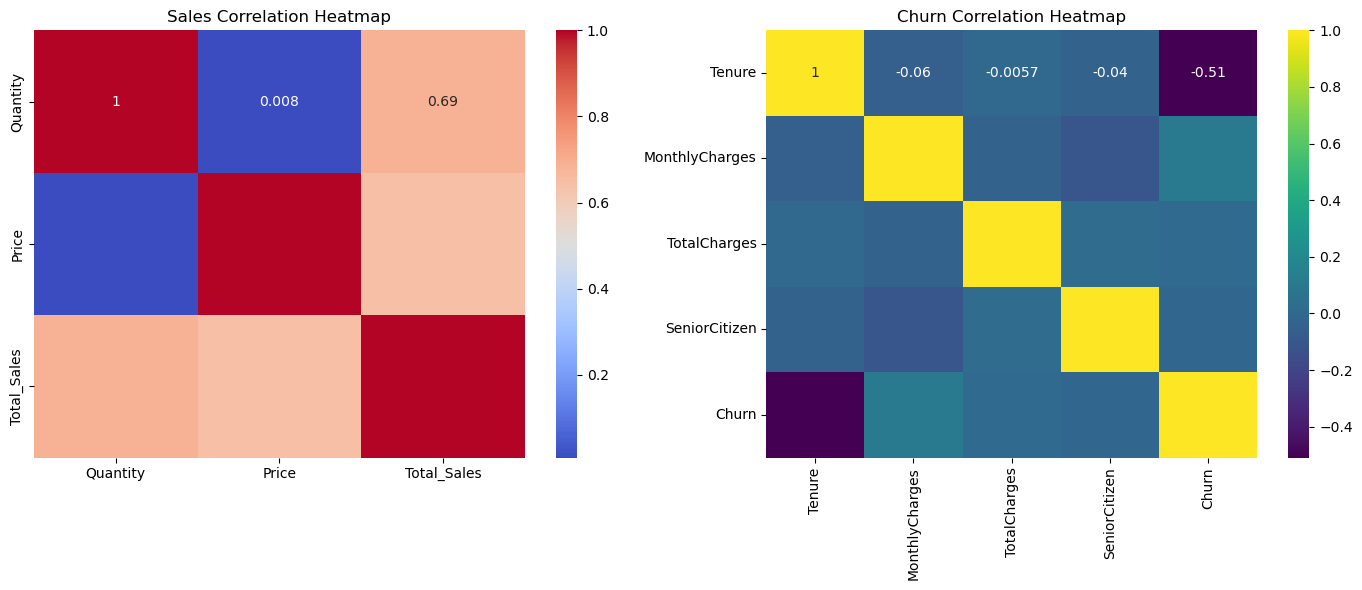

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Day 1: Descriptive Statistics
def get_descriptive_stats(df):
    stats_df = df.describe().T
    stats_df['mode'] = df.mode().iloc[0]
    return stats_df

sales_desc = get_descriptive_stats(sales_df[['Quantity', 'Price', 'Total_Sales']])
churn_desc = get_descriptive_stats(churn_df[['Tenure', 'MonthlyCharges', 'TotalCharges']])

print("Day 1: Descriptive Statistics - Sales")
print(sales_desc)
print("\nDay 1: Descriptive Statistics - Churn")
print(churn_desc)

# Day 2: Data Distribution Analysis
# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(sales_df['Total_Sales'], kde=True, color='blue')
plt.title('Distribution of Total Sales')

plt.subplot(1, 2, 2)
sns.histplot(churn_df['MonthlyCharges'], kde=True, color='green')
plt.title('Distribution of Monthly Charges')
plt.tight_layout()
plt.savefig('distributions.png')

# Normality Tests (D'Agostino's K^2)
_, p_sales = stats.normaltest(sales_df['Total_Sales'])
_, p_churn = stats.normaltest(churn_df['MonthlyCharges'])

print(f"\nDay 2: Normality Test P-values")
print(f"Total Sales: {p_sales:.4f} ({'Normal' if p_sales > 0.05 else 'Not Normal'})")
print(f"Monthly Charges: {p_churn:.4f} ({'Normal' if p_churn > 0.05 else 'Not Normal'})")

# Day 3: Correlation Analysis
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(sales_df[['Quantity', 'Price', 'Total_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Sales Correlation Heatmap')

plt.subplot(1, 2, 2)
sns.heatmap(churn_df[['Tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']].corr(), annot=True, cmap='viridis')
plt.title('Churn Correlation Heatmap')
plt.tight_layout()
plt.savefig('heatmaps.png')

print("\nDay 3: Correlation calculations completed.")

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Day 4: Hypothesis Testing

# Test 1: T-test for Total Sales (East vs West)
east_sales = sales_df[sales_df['Region'] == 'East']['Total_Sales']
west_sales = sales_df[sales_df['Region'] == 'West']['Total_Sales']
t_stat, p_val_t = stats.ttest_ind(east_sales, west_sales)

# Test 2: T-test for Monthly Charges (Churned vs Not Churned)
churned = churn_df[churn_df['Churn'] == 1]['MonthlyCharges']
not_churned = churn_df[churn_df['Churn'] == 0]['MonthlyCharges']
t_stat_churn, p_val_churn = stats.ttest_ind(churned, not_churned)

# Test 3: ANOVA for Total Sales across all Regions
model = ols('Total_Sales ~ C(Region)', data=sales_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Day 4: Hypothesis Testing Results")
print(f"Test 1 (East vs West Sales): t={t_stat:.4f}, p={p_val_t:.4f}")
print(f"Test 2 (Churn vs MonthlyCharges): t={t_stat_churn:.4f}, p={p_val_churn:.4f}")
print("\nTest 3 (ANOVA - Sales by Region):")
print(anova_table)

# Day 5: Confidence Intervals (95%)
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return m, m - h, m + h, h

sales_ci = confidence_interval(sales_df['Total_Sales'])
charges_ci = confidence_interval(churn_df['MonthlyCharges'])

print(f"\nDay 5: Confidence Intervals (95%)")
print(f"Mean Total Sales: {sales_ci[0]:.2f} +/- {sales_ci[3]:.2f} [{sales_ci[1]:.2f}, {sales_ci[2]:.2f}]")
print(f"Mean Monthly Charges: {charges_ci[0]:.2f} +/- {charges_ci[3]:.2f} [{charges_ci[1]:.2f}, {charges_ci[2]:.2f}]")

# Day 6: Regression Analysis

# Sales Regression: Total_Sales ~ Quantity + Price
X_sales = sales_df[['Quantity', 'Price']]
X_sales = sm.add_constant(X_sales)
y_sales = sales_df['Total_Sales']
reg_sales = sm.OLS(y_sales, X_sales).fit()

# Churn Regression: TotalCharges ~ Tenure
X_churn = churn_df[['Tenure']]
X_churn = sm.add_constant(X_churn)
y_churn = churn_df['TotalCharges']
reg_churn = sm.OLS(y_churn, X_churn).fit()

print("\nDay 6: Regression Analysis Results")
print(f"Sales Regression R-squared: {reg_sales.rsquared:.4f}")
print(f"Churn Regression (Tenure -> TotalCharges) R-squared: {reg_churn.rsquared:.4f}")
print("\nSales Regression Summary Snippet:")
print(reg_sales.params)

Day 4: Hypothesis Testing Results
Test 1 (East vs West Sales): t=2.0202, p=0.0496
Test 2 (Churn vs MonthlyCharges): t=2.4102, p=0.0163

Test 3 (ANOVA - Sales by Region):
                 sum_sq    df         F    PR(>F)
C(Region)  6.292020e+10   3.0  2.164363  0.097237
Residual   9.302719e+11  96.0       NaN       NaN

Day 5: Confidence Intervals (95%)
Mean Total Sales: 123650.48 +/- 19874.13 [103776.35, 143524.61]
Mean Monthly Charges: 113.64 +/- 4.55 [109.08, 118.19]

Day 6: Regression Analysis Results
Sales Regression R-squared: 0.8839
Churn Regression (Tenure -> TotalCharges) R-squared: 0.0000

Sales Regression Summary Snippet:
const      -121682.217376
Quantity     26430.840177
Price            4.610622
dtype: float64
